In [1]:
#Packages import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\config\__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to C:\Users\Nick Landing\.lightkurve\cache. Please move all the files in the legacy directory C:\Users\Nick Landing\.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
# Search for your target using its TIC ID 
TIC = 'TIC 353894978' 

In [3]:
# Check the availability of the data for this target
available_data_all = lk.search_lightcurve(TIC, author='SPOC');

In [4]:
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 14,2019,SPOC,120,353894978,0.0
1,TESS Sector 15,2019,SPOC,120,353894978,0.0
2,TESS Sector 16,2019,SPOC,120,353894978,0.0
3,TESS Sector 17,2019,SPOC,120,353894978,0.0
4,TESS Sector 18,2019,SPOC,120,353894978,0.0
5,TESS Sector 19,2019,SPOC,120,353894978,0.0
6,TESS Sector 20,2019,SPOC,120,353894978,0.0
7,TESS Sector 21,2020,SPOC,120,353894978,0.0
8,TESS Sector 22,2020,SPOC,120,353894978,0.0


C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:414: LightkurveWarnin

<IPython.core.display.Javascript object>


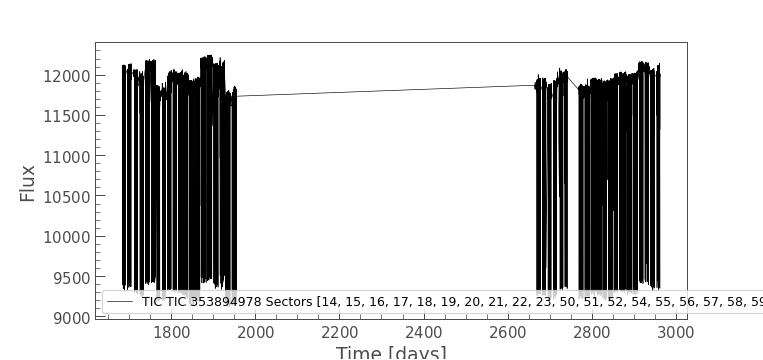

In [5]:
# Define list of sectors to download
sectors = [14,15,16,17,18,19,20,21,22,23,50,51,52,54,55,56,57,58,59,60]

# Download and concatenate light curves for each sector
lc_all = []
for sector in sectors:
    # Download light curve
    lc = lk.search_lightcurve(TIC, sector=sector).download().remove_nans();
    
    # Append to list
    lc_all.append(lc)

# Concatenate light curves
lc_all = lc_all[0].append(lc_all[1:])

# Plot light curves
lc_all.plot(label='TIC '+str(TIC)+' Sectors '+str(sectors), c='k', lw=0.5)

# Add legend and axis labels
plt.legend()
plt.xlabel('Time [days]')
plt.ylabel('Flux')

# Show plot
plt.show()

<IPython.core.display.Javascript object>


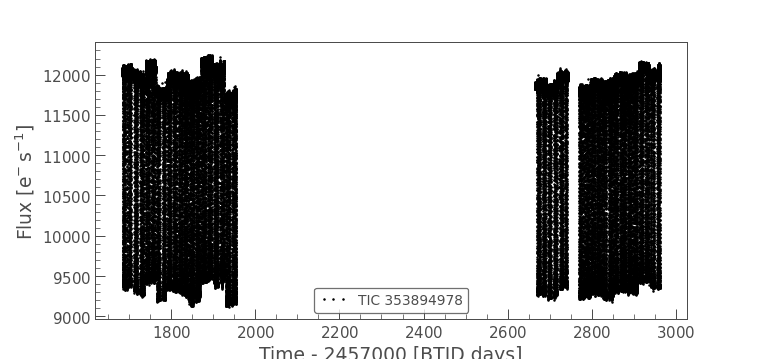

In [6]:
lc_all.plot(color = 'black', lw = 0, marker = '.');

<IPython.core.display.Javascript object>


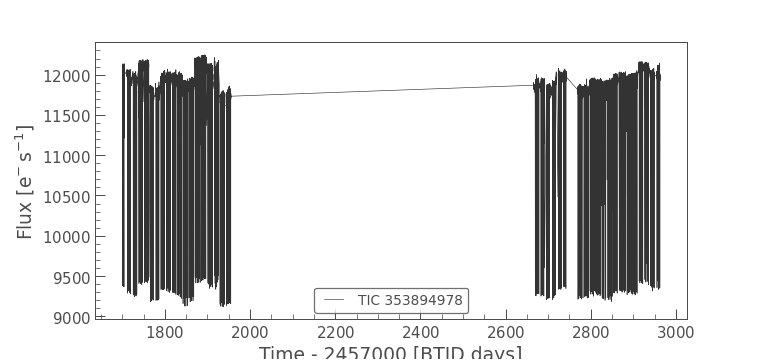

<IPython.core.display.Javascript object>


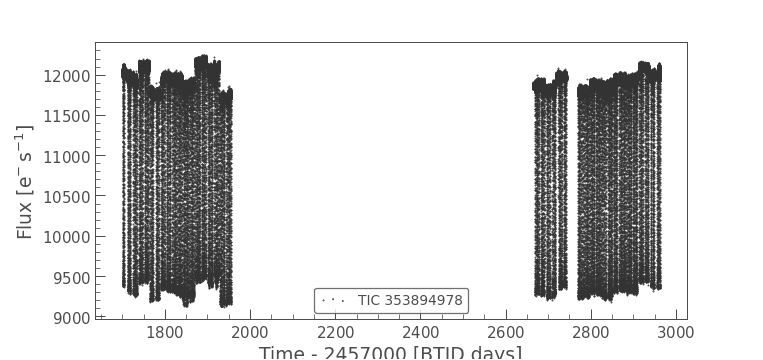

In [7]:
mask = ((lc_all.time.value < 3000)&(lc_all.time.value > 1700))
masked_lc=lc_all[mask];
masked_lc.plot();
masked_lc.scatter(s=1);

`period` contains 786428 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


<IPython.core.display.Javascript object>


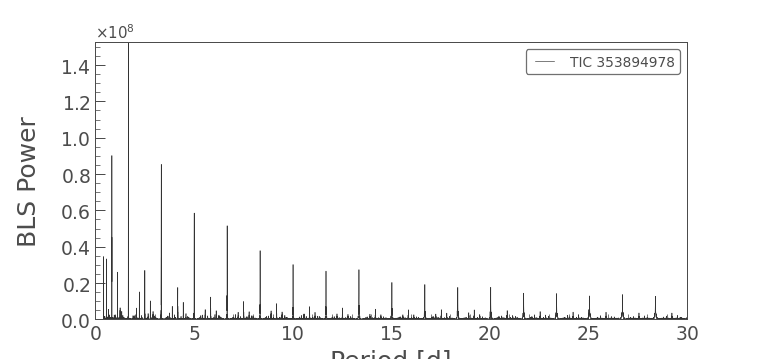

Period at 1th max power = 1.671036710367103773 d
BLS max power = 152563096.435379
Epoch max power = 2458700.630568
----------------------------------------
Period at 2th max power = 1.670740707407073922 d
BLS max power = 133227616.630959
Epoch max power = 2458700.750568
----------------------------------------
----------------------------------------
Period at 3th max power = 0.835420354203542104 d
BLS max power = 90150519.807965
Epoch max power = 2458700.715568
----------------------------------------
Period at 4th max power = 3.341677416774167853 d
BLS max power = 85300667.704303
Epoch max power = 2458702.385568
----------------------------------------
Period at 5th max power = 3.341973419734197481 d
BLS max power = 85272217.146135
Epoch max power = 2458702.320568
----------------------------------------
Period at 6th max power = 1.671332713327133623 d
BLS max power = 64960953.689701
Epoch max power = 2458700.510568
----------------------------------------
Period at 7th max power = 1

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 30)
plt.ylim([0, 152563096.435379])

# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(9):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')


C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


<IPython.core.display.Javascript object>


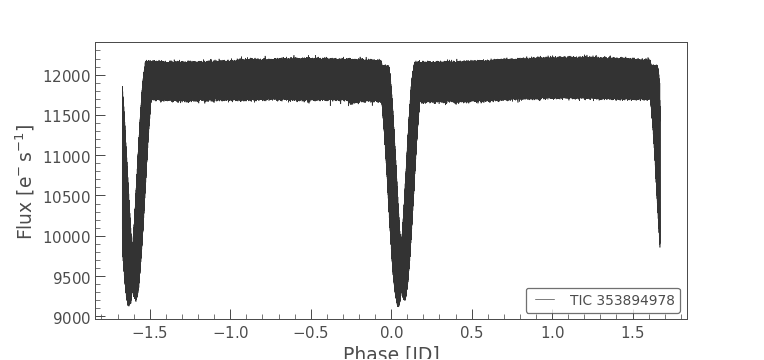

<IPython.core.display.Javascript object>


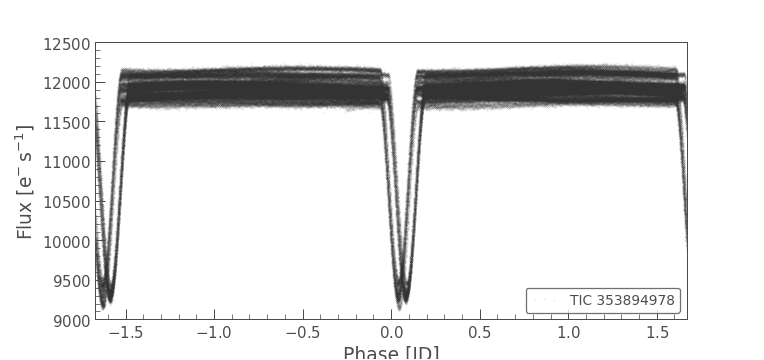

(9000.0, 12500.0)

In [29]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue= 3.341677416774167853
epochtime = 2458702.385568
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=0.01)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.67,1.67)
plt.ylim([9000,12500])

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


<IPython.core.display.Javascript object>


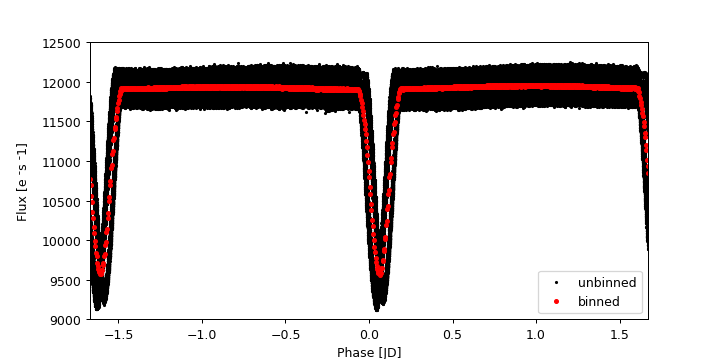

(9000.0, 12500.0)

In [31]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.67,1.67)
plt.ylim([9000,12500])

In [32]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  9565.126953125 electron / s
median flux = 11925.9404296875 electron / s
Tdepth =  2360.8134765625 electron / s
Tdepth in ppm =  2360813476.5625 electron / s ppm
Rp/Rs ratio =  48.588203059616234 electron(1/2) / s(1/2)


In [33]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [34]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 4.800000000000001 d hours


In [35]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  1389.5945276787547 electron / s
depth in ppm = 1389594527.6787548 electron / s ppm


In [36]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

1.6710367103671038 d
1700.6305684868287
0.2 d


In [37]:
P = 1.671036710367103773 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 1.23 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 4417230161.778646 m
a = 4417230.1617786465 km
a = 0.029527359315433436 AU
The planetary mass was neglected


In [38]:
L = 5.333327 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 2.2019262228578618 AU
The outer boundary of the habitable zone ro = 3.1722044593745014 AU


In [39]:
Rs = 1.94345 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 65754511.06510328 electron(1/2) / s(1/2) km
Rp= 10320.908972704956 electron(1/2) / s(1/2) Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 3.2640388101899607


In [40]:
P = 3.8770507705077053 * 24 * 60 * 60
pi = math.pi
a = 5388848826.434916 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 101078.93052473203 m/s


In [41]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  1.6710367103671038 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  4.800000000000001 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  2360.8134765625 electron / s
Transit depth in ppm =  2360813476.5625 electron / s ppm
Transit Depth from bls model in ppm = 1389594527.6787548 electron / s ppm
Rp/Rs ratio =  48.588203059616234 electron(1/2) / s(1/2)
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 65754511.06510328 electron(1/2) / s(1/2) km
Rp= 10320.908972704956 electron(1/2) / s(1/2) Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 5388848826.434916 m
a = 5388848.826434916 km
a = 0.036022228810152095 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 3.2640388101899607
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 101078.93052473203 m/s
- - - - - - - - - - - - - - - - - - - - 


In [42]:
import cmath
import astropy.units as u
from astropy.constants import R_sun

#Calculation of total transit duration Tt
Tt = ((((4 * period **(2) * Tdepth ** (1/2))/(math.pi ** 2)) * (((Rs*Rsun)/(a/1000))**(2))) + (planet_b_dur ** (2))) ** (1/2)
print('Total transit duration T14 Tt =', Tt)
print('Tt in hours =', Tt * 24 * u.hr)

#Calculation of the impact parameter b for eccentricity e=0
b = abs(( ((1-cmath.sqrt(Tdepth))**(2)-(planet_b_dur/Tt)**(2)) * (1+cmath.sqrt(Tdepth))**(2)  ) / cmath.sqrt(1 - (planet_b_dur/Tt)**(2) ))
print('Impact parameter b =', b)

#Calculation of inclination
i = cmath.acos(b*(Rs*R_sun)/(a*u.km))
print('Inclination i =', (90 - i.real*u.rad).to(u.deg))


UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

In [43]:
lk.show_citation_instructions()